Sentiment analysis can be done with or without building a machine learning model. This article will go over the Python implementation of VADERfor non-model sentiment analysis. 

After reading the article, you will learn
* What is VADER?
* How to use Python library VADER for sentiment analysis?


Let's get started!

# Step 1: Install And Import Python Libraries

The first step is to install and import Python libraries.
We need to install the `vaderSentiment` package for VADER and the`flair` package for flair.

In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.4 MB/s 


After installing the packages, let's import the Python libraries. We need to import `pandas` and `numpy` for data processing. 

For the sentiment analysis, we need to import `TextBlob`, `SentimentIntensityAnalyzer` from `vaderSentiment`, and `TextClassifier` from `flair`. We also need to load the English sentiment data from `TextClassifier` and import `Sentence` for text processing for the flair pre-trained model.

To check the sentiment prediction accuracy, we need to import `accuracy_score` from `sklearn`.

Last but not least, we set the `pandas` dataframe column width to be 1000, which will allow us to see more content from the review.

In [2]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
os.chdir("./drive/My Drive/Colab Notebooks")

# Print out the current directory
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


Now let's read the data into a `pandas` dataframe and see what the dataset looks like.

In [13]:
# Read in data
amz_review = pd.read_csv('Reviews_Filter.csv', sep='\t', names=['review'])

# Take a look at the data
amz_review.head()

,review
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text"
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most."
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."""
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."""
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal."


In [24]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
amz_review['review']=amz_review['review'].apply(remove_stopwords)

In [28]:
amz_review.head()

,review,scores_VADER,pred_VADER
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text",0.0000,1
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I bought several Vitality canned dog food products found good quality. The product looks like stew processed meat smells better. My Labrador finicky appreciates product better most.",0.9441,1
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not Advertised,""Product arrived labeled Jumbo Salted Peanuts...the peanuts actually small sized unsalted. Not sure error vendor intended represent product """"Jumbo"""".""",-0.5664,0
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says all"",""This confection around centuries. It light, pillowy citrus gelatin nuts - case Filberts. And cut tiny squares liberally coated powdered sugar. And tiny mouthful heaven. Not chewy, flavorful. I highly recommend yummy treat. If familiar story C.S. Lewis' """"The Lion, The Witch, The Wardrobe"""" - treat seduces Edmund selling Brother Sisters Witch.""",0.8138,1
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If looking secret ingredient Robitussin I believe I found it. I got addition Root Beer Extract I ordered (which good) made cherry soda. The flavor medicinal.",0.4404,1


In [29]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,scores_VADER,pred_VADER
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text",0.0000,1
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I bought several Vitality canned dog food products found good quality. The product looks like stew processed meat smells better. My Labrador finicky appreciates product better most.",0.9413,1
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not Advertised,""Product arrived labeled Jumbo Salted Peanuts...the peanuts actually small sized unsalted. Not sure error vendor intended represent product """"Jumbo"""".""",0.0762,1
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says all"",""This confection around centuries. It light, pillowy citrus gelatin nuts - case Filberts. And cut tiny squares liberally coated powdered sugar. And tiny mouthful heaven. Not chewy, flavorful. I highly recommend yummy treat. If familiar story C.S. Lewis' """"The Lion, The Witch, The Wardrobe"""" - treat seduces Edmund selling Brother Sisters Witch.""",0.7926,1
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If looking secret ingredient Robitussin I believe I found it. I got addition Root Beer Extract I ordered (which good) made cherry soda. The flavor medicinal.",0.4404,1


In [32]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

After getting predictions from VADER, let's check the prediction accuracy. 

In [37]:
amz_review.dropna(axis = 0, how ='any',inplace=True)

In [45]:
# Compare Actual and Predicted
accuracy_score(amz_review['review'],amz_review['pred_VADER'])

0.0

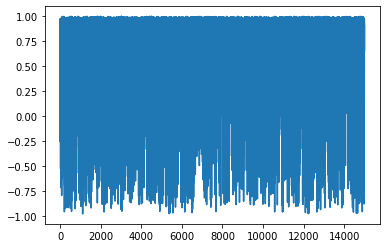

In [46]:
import matplotlib.pyplot as plt
amz_review['scores_VADER'].plot()
plt.show()

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context("talk")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


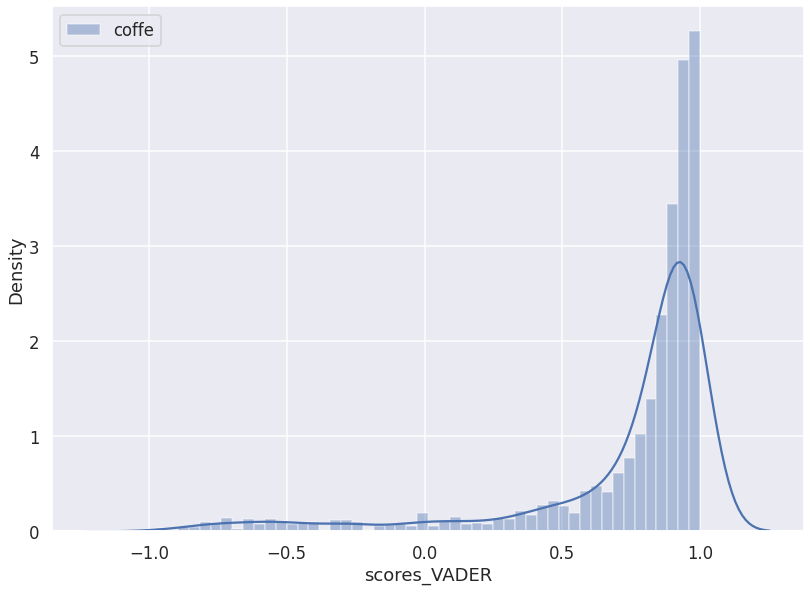

In [50]:
coffe = amz_review[amz_review['review'].str.contains('coffe')]

sns.distplot(coffe['scores_VADER'], hist=True, label='coffe')

plt.legend(title='');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


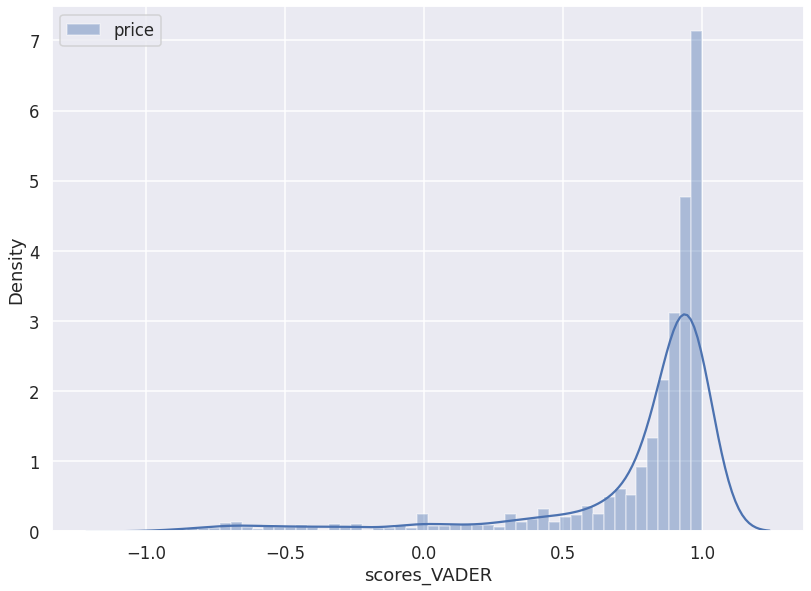

In [53]:
price = amz_review[amz_review['review'].str.contains('price')]

sns.distplot(price['scores_VADER'], hist=True, label='price')

plt.legend(title='');